#Polinom Linear Regression
#y = a + bx + cx^2 + .... + nx^n + ....

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("/Users/alperencngzz/Desktop/ecodata/Position_Salaries.csv")

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset = dataset.drop(["Position"], axis = True)

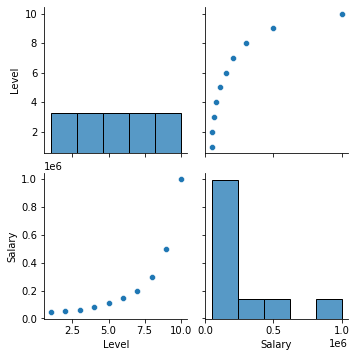

In [5]:
sns.pairplot(dataset);

Verilerin grafikteki dağılımına bakıp düz bir çizgi yani linear regression ile halledilemeyeceğini görüyoruz, bu yüzden polinom regression kullanmamız gerektiğini anlıyoruz. Grafik de zaten polinom grafiği gibi görünüyor.

In [6]:
X = dataset.drop(["Salary"], axis = True)
y = dataset["Salary"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 1), (2, 1), (8,), (2,))

In [9]:
# linear regression ile çözünce çıkan sonuçlar
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("Training Accuracy : ", lin_reg.score(X_train, y_train))
print("Testing Accuracy : ", lin_reg.score(X_test, y_test))

Training Accuracy :  0.6366049276570868
Testing Accuracy :  0.8451346684575975


In [10]:
# Polinomial regression ile çözünce çıkan sonuçlar
from sklearn.preprocessing import PolynomialFeatures

# bu kısım regression'u polinomik haldeyken çözmeyi lineale uyarlıyor yani polinom regression'a uygun hale getiriyor verileri
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
#

# bu kısım normal linear regression ile aynı, ama test ve train grupları ayarlı olduğu için sorun olmuyor
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
#

print("Training Accuracy : ", lin_reg_2.score(X_poly, y_train))
print("Testing Accuracy : ", lin_reg_2.score(X_poly_test, y_test))

Training Accuracy :  0.9995857211026753
Testing Accuracy :  0.9714666803840316


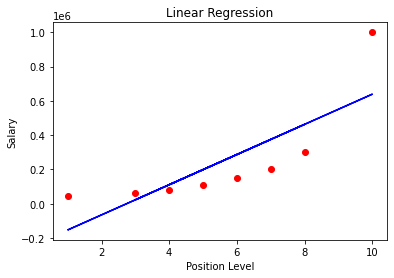

In [11]:
# Linear regression ile yapılan tahminlerin sonuçları
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

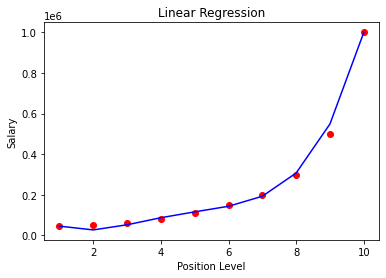

In [12]:
# Polinomial regression ile yapılan tahminlerin sonuçları
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()